In [1]:
#pip install sklearn

In [2]:
#pip install nltk

In [3]:
#pip install gensim 

In [4]:
#pip install wordcloud 

In [6]:
# Import all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import warnings
warnings.filterwarnings('ignore')

In [7]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
import re
import nltk
from gensim.models import Word2Vec
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
#nltk.download('punkt')

In [9]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
us_state_abbrev_reverse = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'PR': 'Puerto Rico',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
}

#Northern Mariana Islands':'MP', 'Palau': 'PW', 'Puerto Rico': 'PR', 'Virgin Islands': 'VI', 'District of Columbia': 'DC'

In [11]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

#'Northern Mariana Islands':'MP', 'Palau': 'PW', 'Puerto Rico': 'PR', 'Virgin Islands': 'VI', 'District of Columbia': 'DC'
#abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [14]:
# Load CSV file into a DataFrame
#ds_jobs_df = pd.read_csv('job_postings_June_2021.csv')
ds_jobs_df = pd.read_csv('Indeed_Data_Science_Job_Postings_June_2021_DS4A_Project.csv')

In [15]:
ds_jobs_df

,title,company,location,description
0,Data Scientist,Harvey Nash Group,"Mossville, IL",Data Scientist/ Dev/Research Engineer 3 (11976...
1,Data Scientist 2,Oracle,Virginia+5 locations,"Data Science Associate, Oracle for Startups\n\..."
2,Senior Data Scientist,TIBCO Software,"Chapel Hill, NC",Our Data Scientists are central to our global ...
3,AI/ML Data Scientist,FinTek Solutions LLC,"Atlanta, GA","Visas accepted- H4-EAD, GC, GC-EAD, US Citizen..."
4,Data Scientist - NO C2C,Rangam Consultants Inc,"Oak Brook, IL 60523•Temporarily Remote",This position is responsible for enabling Util...
...,...,...,...,...
4589,Senior ML/CV/AI Software Engineer,Skyways,"Manor, TX 78653",[Please only apply if you have at least 5 year...
4590,LEAD DATA SCIENTIST,Presbyterian Healthcare Services,"Albuquerque, NM 87113 (Wildflower area)",Overview:\n\nJob Description\nType of Opportun...
4591,Bioinformatics Analyst - Data Scientists (REQ1...,Frederick National Laboratories,"Rockville, MD 20849",Bioinformatics Analyst - Data Scientists\n\nJo...
4592,AI/ML Data Engineer,MORSE Corp,"Cambridge, MA 02139 (Cambridgeport area)","MORSE is an innovative, employee-owned, tech c..."


In [16]:
#drop duplicates
ds_jobs = ds_jobs_df.copy()
ds_jobs.drop_duplicates(inplace=True)
#ds_jobs.drop_duplicates(subset=['title', 'description'], inplace=True)

In [17]:
#Remove rows with null values
#ds_jobs.dropna(subset=['company'], how='all', inplace = True)
ds_jobs.dropna(inplace = True)

In [18]:
ds_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139 entries, 0 to 4567
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        1139 non-null   object
 1   company      1139 non-null   object
 2   location     1139 non-null   object
 3   description  1139 non-null   object
dtypes: object(4)
memory usage: 44.5+ KB


#### Average Vacancy per company

In [19]:
companies_total = ds_jobs['company'].nunique()
print('Total number of companies with data science job vacancies:', companies_total)

Total number of companies with data science job vacancies: 726


In [20]:
#Average job posting per company
print('Average number of postings per company: ', int(len(ds_jobs['company']))/companies_total)

Average number of postings per company:  1.5688705234159779


#### Vacancies from each company

In [21]:
company_vac = ds_jobs.groupby(['company'])['title'].count()
company_vac = company_vac.reset_index(name='title').sort_values(['title'], ascending=False).head(25)
#company_vac = company_vac.sort_values(['title'], ascending=False)
#company_vac = company_vac.head(25)
company_vac

,company,title
669,Uber,23
382,Liberty Mutual Insurance,18
50,Apple,16
340,Intuit,16
301,Harnham,16
18,Accenture,13
98,Booz Allen Hamilton,13
550,Salesforce,11
410,Microsoft,9
75,Battelle,9


#### Plot of Companies with the highest Job Vacancies

Text(0, 0.5, 'Number OF JOBS')

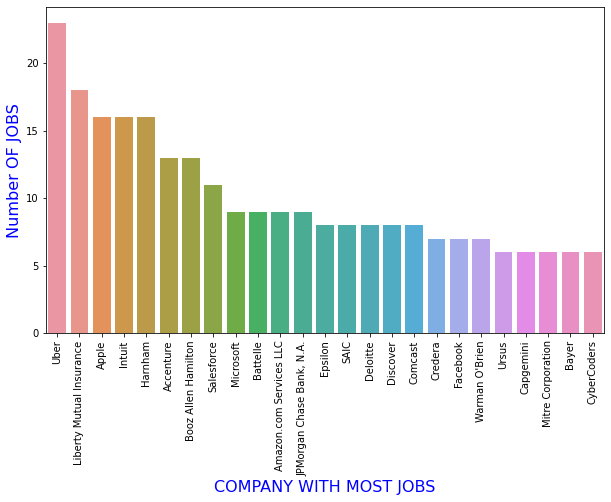

In [22]:
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.barplot(x="company", y="title", data= company_vac)    
ax.set_xticklabels(company_vac['company'], rotation=90)  
ax.set_xlabel('COMPANY WITH MOST JOBS',fontsize=16, color='blue')
ax.set_ylabel('Number OF JOBS', fontsize=16, color='blue') 

In [23]:
ds_j_df = ds_jobs.copy()

### Analysis of Jobs in Cities

In [24]:
job_data = ds_jobs.copy()

In [25]:
job_data['location']

0                                           Mossville, IL
1                                    Virginia+5 locations
2                                         Chapel Hill, NC
3                                             Atlanta, GA
4                  Oak Brook, IL 60523•Temporarily Remote
                              ...                        
4550                                  Chantilly, VA 20151
4564    Phoenix, AZ 85001 (Central City area)•Temporar...
4565                                       Menlo Park, CA
4566                                           Boston, MA
4567                                          Chicago, IL
Name: location, Length: 1139, dtype: object

In [26]:
def clean_city(df):
    new = df['location'].str.split(",", expand = True)
    n1 = new[0].str.split("+", expand = True)
    new['city'] = n1[0]
    n4 = new['city'].str.split("•", expand = True)
    job_data['city'] = n4[0]
    #return job_data['city']

In [27]:
def clean_location(df):
    new = df['location'].str.split(",", expand = True)
    
    #clean_city(df)
    #Clean City
    n1 = new[0].str.split("+", expand = True)
    new['city'] = n1[0]
    n4 = new['city'].str.split("•", expand = True)
    new['city'] = n4[0]
    df['city'] = n4[0]
    
    #Clean State
    n2 = new[1].str.split(" ", expand = True)
    n2 = n2[1].str.replace('•', "+")
    n2 = n2.str.replace('+', " ")
    n2 = n2.str.split(" ", expand = True)
    new['State'] = n2[0]
    new['State'] = new['State'].replace(us_state_abbrev_reverse)
    new['State'].fillna(value='empty', inplace=True)
    new['State'].replace('empty', 'Same_with_City', inplace=True)
    
    new['State'] = np.where(new['State'] == 'Same_with_City', new['city'], new['State'])
    df['State'] = new['State']
    
    df['location'] = df[['city', 'State']].apply(lambda x: ', '.join(x), axis=1)
    
    return df

In [28]:
jobs = clean_location(job_data)

In [29]:
#Total number of cities with Data Science Jobs
total_job_cities = jobs['location'].nunique()
total_job_cities

320

In [30]:
#Jobs that have remote options
remote_jobs = jobs[jobs['location'].str.contains('Remote')]
print('Total number of jobs with remote options: ', remote_jobs['location'].count())

Total number of jobs with remote options:  78


In [31]:
#Analysis of Job titles in each city
city_job_title = jobs.groupby(['city'])['title'].count()
city_job_title = city_job_title.reset_index()
city_job_title = city_job_title.sort_values(['title'], ascending=False)
city_job_title = city_job_title.head(25)
city_job_title

,city,title
232,Remote,78
194,New York,75
247,San Francisco,56
56,Chicago,48
303,Washington,33
34,Boston,25
261,Seattle,24
246,San Diego,21
18,Austin,21
15,Atlanta,20


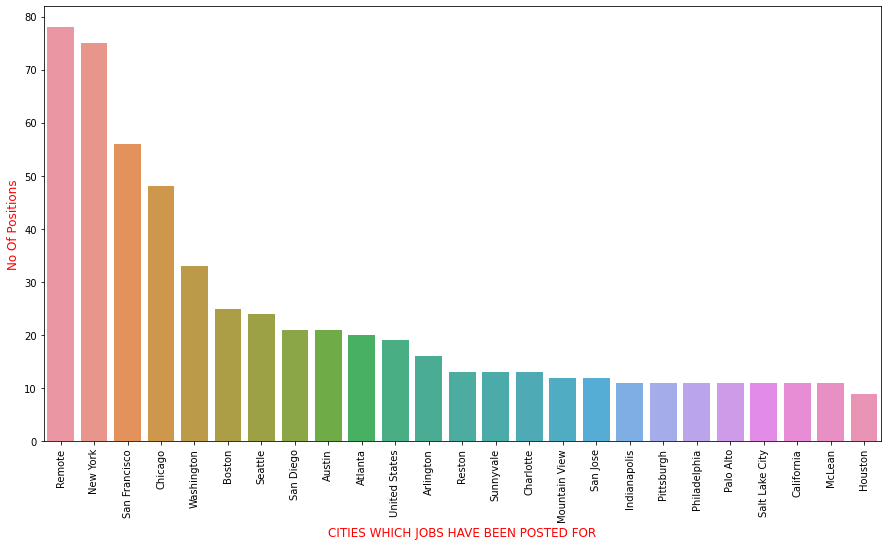

In [32]:
# Plot graph for top most cities and no of roles
fig, a = plt.subplots(figsize=(15,8))             
a = sns.barplot(x="city", y="title", data=city_job_title)# hue="company",
a.set_xticks(range(len(city_job_title['city'])))
a.set_xticklabels(city_job_title['city'], rotation=90)   
a.set_ylabel('No Of Positions', fontsize= 12, color='red')
a.set_xlabel('CITIES WHICH JOBS HAVE BEEN POSTED FOR',fontsize=12,color='red')
plt.show()

In [33]:
#Analysis of Job titles in each city
city_job_title_company = jobs.groupby(['city', 'company'])['title'].count()
city_job_title_company = city_job_title_company.reset_index()
city_job_title_company = city_job_title_company.sort_values(['title'], ascending=False)
city_job_title_company = city_job_title_company.head(25)
city_job_title_company

,city,company,title
744,San Francisco,Uber,14
442,Mountain View,Intuit,9
482,New York,Harnham,9
704,San Diego,Intuit,7
772,Santa Clara Valley,Apple,7
635,Remote,Liberty Mutual Insurance,7
780,Seattle,Apple,6
99,Boston,Liberty Mutual Insurance,6
681,Riverwoods,Discover,6
885,Washington,General Dynamics,5


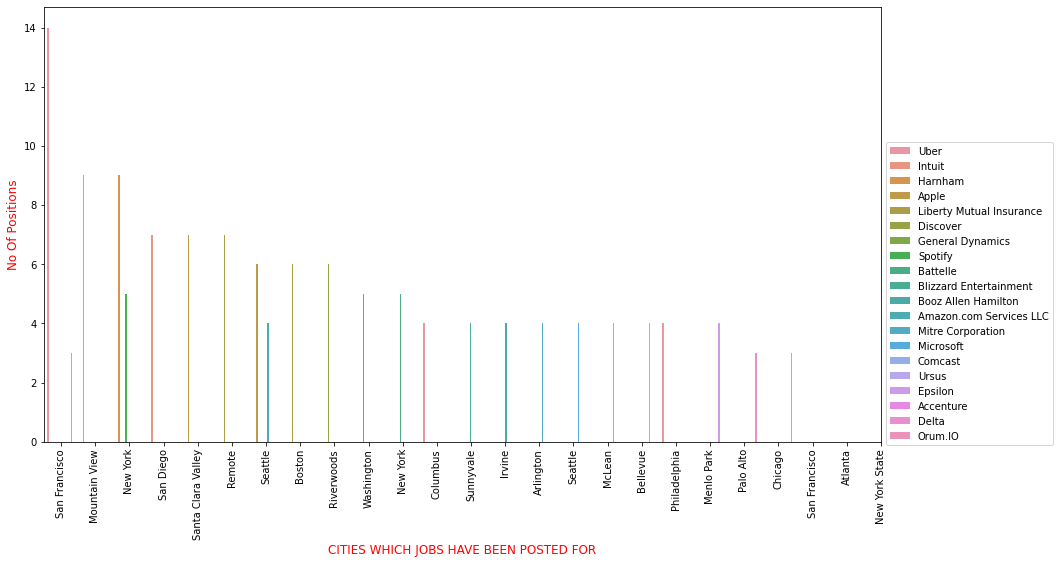

In [34]:
# Plot graph for top most cities and no of roles
fig, a = plt.subplots(figsize=(15,8))             
a = sns.barplot(x="city", y="title", hue="company", data=city_job_title_company)# hue="company",
a.set_xticks(range(len(city_job_title_company['city'])))
a.set_xticklabels(city_job_title_company['city'], rotation=90)   
a.set_ylabel('No Of Positions', fontsize= 12, color='red')
a.set_xlabel('CITIES WHICH JOBS HAVE BEEN POSTED FOR',fontsize=12,color='red')
a.legend(bbox_to_anchor=(1, 0.7), loc='best', borderaxespad=0.5)
plt.show()

In [35]:
#Analysis of Job titles in each state
state_job_title = jobs.groupby(['State'])['title'].count()
state_job_title = state_job_title.reset_index()
state_job_title = state_job_title.sort_values(['title'], ascending=False)
state_job_title = state_job_title.head(25)
state_job_title

,State,title
4,California,226
30,New York,87
13,Illinois,83
38,Remote,78
45,Virginia,77
42,Texas,75
21,Massachusetts,53
46,Washington,41
32,North Carolina,41
8,District of Columbia,34


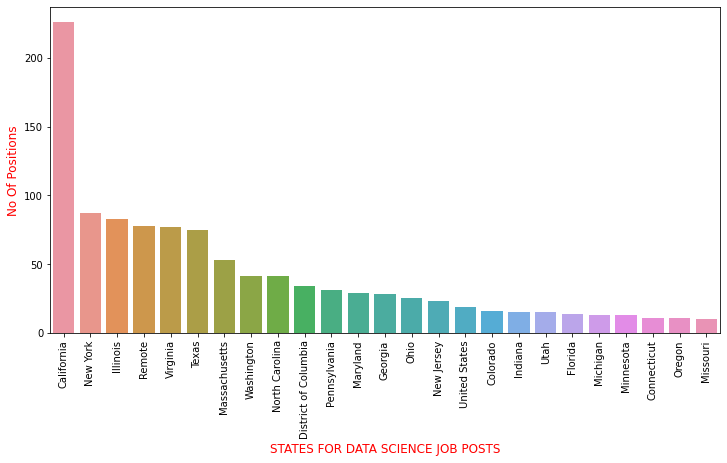

In [36]:
# Plot graph for top most states and no of roles
fig, a = plt.subplots(figsize=(12,6))             
a = sns.barplot(x="State", y="title",  data=state_job_title)
a.set_xticks(range(len(state_job_title['State'])))
a.set_xticklabels(state_job_title['State'], rotation=90)   
a.set_ylabel('No Of Positions',fontsize= 12,color='red')
a.set_xlabel('STATES FOR DATA SCIENCE JOB POSTS',fontsize=12,color='red')
plt.show()

In [37]:
#Analysis of Job titles in each state for each company
state_job_title_company = jobs.groupby(['State', 'company'])['title'].count()
state_job_title_company = state_job_title_company.reset_index()
state_job_title_company = state_job_title_company.sort_values(['title'], ascending=False)
state_job_title_company = state_job_title_company.head(10)
state_job_title_company

,State,company,title
130,California,Uber,22
68,California,Intuit,16
494,New York,Harnham,9
803,Virginia,Booz Allen Hamilton,9
267,Illinois,Discover,8
23,California,Apple,8
655,Remote,Liberty Mutual Insurance,7
849,Washington,Apple,6
374,Massachusetts,Liberty Mutual Insurance,6
190,District of Columbia,General Dynamics,5


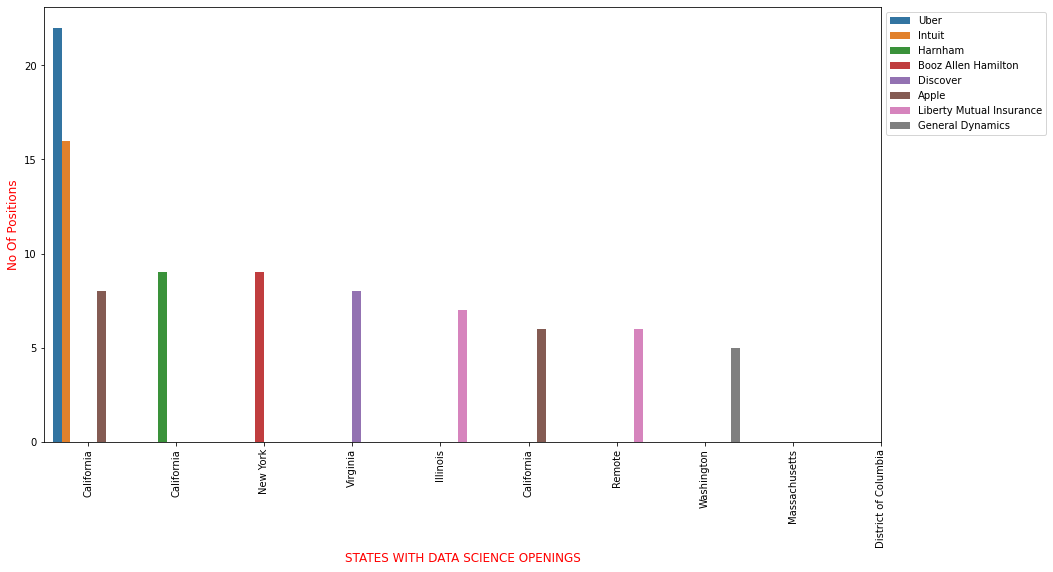

In [38]:
# Plot graph for top most states and no of roles
fig, a = plt.subplots(figsize=(15,8))             
a = sns.barplot(x="State", y="title", hue="company",  data=state_job_title_company, palette='tab10')
a.set_xticks(range(len(state_job_title_company['State'])))
a.set_xticklabels(state_job_title_company['State'], rotation=90)   
a.set_ylabel('No Of Positions',fontsize= 12,color='red')
a.set_xlabel('STATES WITH DATA SCIENCE OPENINGS',fontsize=12,color='red')
a.legend(bbox_to_anchor=(1, 1), loc='best', borderaxespad=0.5)
plt.show()

In [39]:
jobs[jobs['description'].str.contains('Computer Science, Mathematics')]

,title,company,location,description,city,State
1,Data Scientist 2,Oracle,"Virginia, Virginia","Data Science Associate, Oracle for Startups\n\...",Virginia,Virginia
95,Data Scientist,"Analysis Group, Inc.","Boston, Massachusetts",Overview:\nData Scientist\nLocations US-MA-Bos...,Boston,Massachusetts
168,Consumer & Community Banking - Card Risk Machi...,"JPMorgan Chase Bank, N.A.","Wilmington, Delaware",JPMorgan Chase & Co . (NYSE: JPM) is a leading...,Wilmington,Delaware
248,junior Data Scientist,CFSB,"New York, New York",DESCRIPTION\nCSS Junior Data Scientist\nCommun...,New York,New York
292,Senior Machine Learning and NLP Engineer - evi...,Cigna,"Boston, Massachusetts",About eviCore’s inQbator (Cigna is the parent ...,Boston,Massachusetts
310,"AI/ML - Software Engineer, Information Intelli...",Apple,"Santa Clara Valley, California","Summary\nPosted: May 29, 2021\nRole Number:200...",Santa Clara Valley,California
317,Principal Statistical Programmer,"Cytel, Inc (USA)","United States, United States",Cytel provides unrivaled biostatistics and ope...,United States,United States
339,Data Science Solutions Consultant Sr,Anthem,"Louisville, Kentucky",Description\nSHIFT: Day Job\n\nSCHEDULE: Full-...,Louisville,Kentucky
432,Data Engineer - Asymmetric Threat Statistical ...,Leidos,"Reston, Virginia","Description\nJob Description:\nAt Leidos, ever...",Reston,Virginia
462,Senior Data Scientist,XSELL Technologies,"Remote, Remote",XSELL is currently seeking a Data Scientist to...,Remote,Remote


#### Analysis of Job Titles

In [40]:
Total_num_job_titles = jobs['title'].nunique()
print('Total number of titles related to job postings: ', Total_num_job_titles)

Total number of titles related to job postings:  782


In [41]:
#Most common roles across companies
Most_common_job_title = jobs.groupby(['title'])['company'].count()
Most_common_job_title = Most_common_job_title.reset_index()
Most_common_job_title = Most_common_job_title.sort_values(['company'], ascending=False)
Most_common_job_title = Most_common_job_title.head(25)
Most_common_job_title

,title,company
155,Data Scientist,118
537,Senior Data Scientist,41
512,Senior Data Analyst,23
363,Machine Learning Engineer,16
584,Senior Machine Learning Engineer,11
341,Lead Data Scientist,11
432,Principal Data Scientist,8
207,Data Scientist II,7
54,Associate Data Scientist,6
732,Staff Machine Learning Engineer,6


Text(0, 0.5, 'NO OF ROLES ACROSS INDUSTRY')

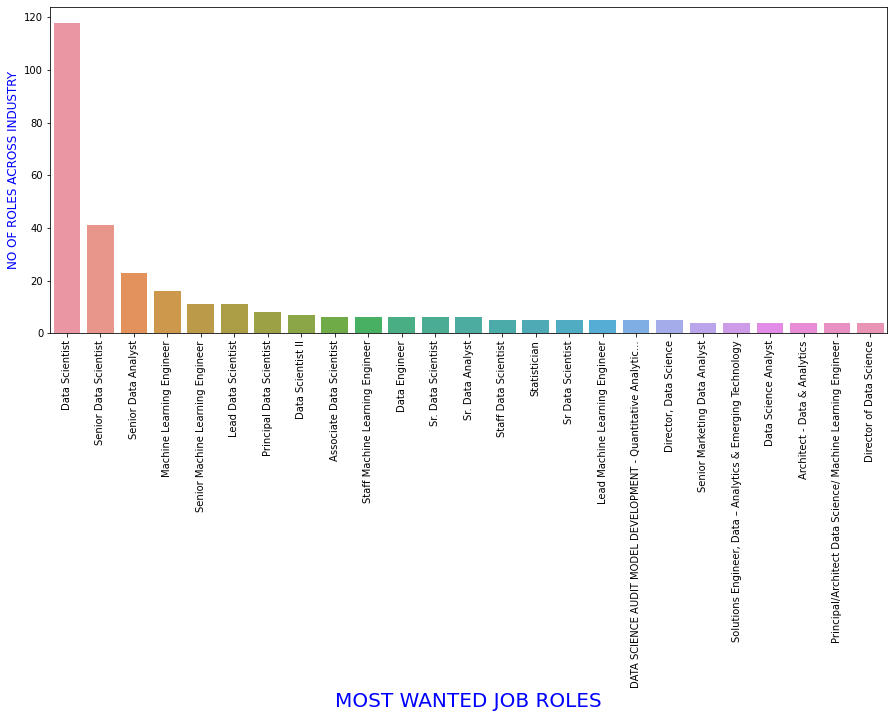

In [42]:
# Plot graph for top most offered roles
fig,ax=plt.subplots(figsize=(15,6))
ax=sns.barplot(x="title", y="company", data = Most_common_job_title)    
ax.set_xticklabels(Most_common_job_title['title'], rotation=90)
ax.set_xlabel('MOST WANTED JOB ROLES', fontsize=20, color='blue')
ax.set_ylabel('NO OF ROLES ACROSS INDUSTRY', fontsize=12,color='blue')

### Categorizing the Job Titles

In [43]:
#There are so many job profiles in the given dataset so lets Categories them into 5; Data Scientist, Machine Learning Engineer, Data Analyst, Data Science Manager and Others

# Creating only 5 datascience roles among all
data = jobs.copy()
#data.dropna(subset=['title'], how='all', inplace = True)
data['position']= [x.upper() for x in data['title']]
data['description'] = [x.upper() for x in data['description']]

data.loc[data.position.str.contains("SCIENTIST"), 'position'] = 'Data Scientist'

data.loc[data.position.str.contains('ENGINEER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('PRINCIPAL STATISTICAL PROGRAMMER'),'position']='Machine Learning Engineer'

data.loc[data.position.str.contains('PROGRAMMER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('DEVELOPER'),'position']='Machine Learning Engineer'

data.loc[data.position.str.contains('ANALYST'), 'position'] = 'Data Analyst'
data.loc[data.position.str.contains('STATISTICIAN'), 'position'] = 'Data Analyst'

data.loc[data.position.str.contains('MANAGER'),'position']='Data Science Manager'

data.loc[data.position.str.contains('CONSULTANT'),'position']='Data Science Manager'
data.loc[data.position.str.contains('DATA SCIENCE'),'position']='Data Science Manager'
data.loc[data.position.str.contains('DIRECTOR'),'position']='Data Science Manager'

#data.position=data[(data.position == 'Data Scientist') | (data.position == 'Data Analyst') | (data.position == 'Machine Learning Engineer') | (data.position == 'Data Science Manager')]
#data.position=['Others' if x is np.nan else x for x in data.position]

position=data.groupby(['position'])['company'].count()   
position=position.reset_index(name='company')
position=position.sort_values(['company'],ascending=False)

print('Here is  the count of each new roles we created :', '\n\n', position)

Here is  the count of each new roles we created : 

                                              position  company
29                                     Data Scientist      494
44                          Machine Learning Engineer      268
27                                       Data Analyst      175
28                               Data Science Manager      126
6                        ARCHITECT - DATA & ANALYTICS        4
..                                                ...      ...
31                               HBO/BEN LEAD DATA QA        1
32               HEAD OF ANALYTICS AT SIDEKICK HEALTH        1
33                    HEAD OF STATISTICAL PROGRAMMING        1
34  INTERDISCIPLINARY RESEARCH FISH BIOLOGIST/RESE...        1
69  VICE PRESIDENT OF PRODUCT (ARTIFICIAL INTELLIG...        1

[70 rows x 2 columns]


In [44]:
data['position']= [x.upper() for x in data['title']]
data['description'] = [x.upper() for x in data['description']]

data.loc[data.position.str.contains("SCIENTIST"), 'position'] = 'Data Scientist'

data.loc[data.position.str.contains('ENGINEER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('PRINCIPAL STATISTICAL PROGRAMMER'),'position']= 'Machine Learning Engineer'
data.loc[data.position.str.contains('PROGRAMMER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('DEVELOPER'),'position']='Machine Learning Engineer'

data.loc[data.position.str.contains('ANALYST'), 'position'] = 'Data Analyst'
data.loc[data.position.str.contains('STATISTICIAN'), 'position'] = 'Data Analyst'

data.loc[data.position.str.contains('MANAGER'),'position']='Data Science Manager'
data.loc[data.position.str.contains('CONSULTANT'),'position']='Data Science Manager'
data.loc[data.position.str.contains('DATA SCIENCE'),'position']='Data Science Manager'
data.loc[data.position.str.contains('DIRECTOR'),'position']='Data Science Manager'

#data.position = data[(data.position == 'Data Scientist') | (data.position == 'Data Analyst') | (data.position == 'Machine Learning Engineer') | (data.position == 'Data Science Manager')]
#data.position = ['Others' if x is np.nan else x for x in data.position]

position = data.groupby(['position'])['company'].count()   
position = position.reset_index(name='company')
position = position.sort_values(['company'],ascending=False)

#print('Here is  the count of each new roles we created :', '\n\n', position)
position

,position,company
29,Data Scientist,494
44,Machine Learning Engineer,268
27,Data Analyst,175
28,Data Science Manager,126
6,ARCHITECT - DATA & ANALYTICS,4
...,...,...
31,HBO/BEN LEAD DATA QA,1
32,HEAD OF ANALYTICS AT SIDEKICK HEALTH,1
33,HEAD OF STATISTICAL PROGRAMMING,1
34,INTERDISCIPLINARY RESEARCH FISH BIOLOGIST/RESE...,1


<AxesSubplot:xlabel='position'>

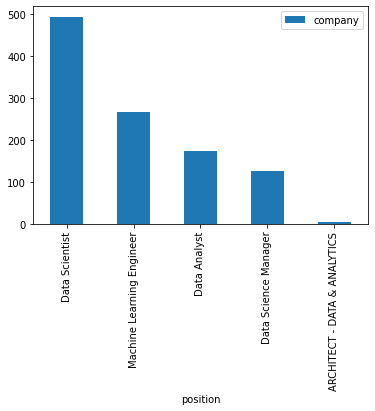

In [45]:
t_roles = position.head(5)
t_roles.plot.bar(x='position', y='company')

### Natural Language Processing of the Job Descriptions

In [46]:
def clean_text(text):
    text = str(text)
    text = text.replace("\n"," ")
    text = text.lower()
    #text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    return text.lower()

In [47]:
data["clean_description"] = data["description"].apply(clean_text)

In [48]:
data

,title,company,location,description,city,State,position,clean_description
0,Data Scientist,Harvey Nash Group,"Mossville, Illinois",DATA SCIENTIST/ DEV/RESEARCH ENGINEER 3 (11976...,Mossville,Illinois,Data Scientist,data scientist devresearch engineer location...
1,Data Scientist 2,Oracle,"Virginia, Virginia","DATA SCIENCE ASSOCIATE, ORACLE FOR STARTUPS\n\...",Virginia,Virginia,Data Scientist,data science associate oracle for startups an...
2,Senior Data Scientist,TIBCO Software,"Chapel Hill, North Carolina",OUR DATA SCIENTISTS ARE CENTRAL TO OUR GLOBAL ...,Chapel Hill,North Carolina,Data Scientist,our data scientists are central to our global ...
3,AI/ML Data Scientist,FinTek Solutions LLC,"Atlanta, Georgia","VISAS ACCEPTED- H4-EAD, GC, GC-EAD, US CITIZEN...",Atlanta,Georgia,Data Scientist,visas accepted gc gcead us citizens no and o...
4,Data Scientist - NO C2C,Rangam Consultants Inc,"Oak Brook, Illinois",THIS POSITION IS RESPONSIBLE FOR ENABLING UTIL...,Oak Brook,Illinois,Data Scientist,this position is responsible for enabling util...
...,...,...,...,...,...,...,...,...
4550,"Data Scientist, Senior",Booz Allen Hamilton,"Chantilly, Virginia",THE CHALLENGE:\nARE YOU LOOKING FOR AN OPPORTU...,Chantilly,Virginia,Data Scientist,the challenge are you looking for an opportuni...
4564,Data Scientist,Cyient,"Phoenix, Arizona",ABOUT THE ROLE:\nTHE POSITION CREATES NEW FOOT...,Phoenix,Arizona,Data Scientist,about the role the position creates new footpr...
4565,"Machine Learning Data Specialist, Community Pa...",Ursus,"Menlo Park, California","JOB TITLE: MACHINE LEARNING DATA SPECIALIST, C...",Menlo Park,California,"MACHINE LEARNING DATA SPECIALIST, COMMUNITY PA...",job title machine learning data specialist com...
4566,"Director, Statistical Programming",Penfield Search Partners,"Boston, Massachusetts",SALARY: COMMENSURATE WITH EXPERIENCE\nREFERENC...,Boston,Massachusetts,Data Science Manager,salary commensurate with experience reference ...


In [49]:
print(data["description"][2])

OUR DATA SCIENTISTS ARE CENTRAL TO OUR GLOBAL STRATEGY. THEIR WORK ENABLES OUR CLIENTS TO QUICKLY CREATE AND DEPLOY SOLUTIONS THAT DRIVE INNOVATION, OPTIMISE OPERATIONS, OFFER INSIGHT AND DRIVE TRANSFORMATION. ULTIMATELY THE TEAM ARE RESPONSIBLE FOR ENABLING OUR CLIENT’S COMPETITIVENESS BY ACCELERATING ROI FROM ANY DATA SCIENCE INITIATIVE WITH PRODUCTS THAT TRANSFORM DATA INTO INSIGHT.
OPERATING ACROSS SECTORS AND WITH A HIGH DEGREE OF INDEPENDENCE OUR DATA SCIENTISTS HAVE HELPED IMPROVE PERFORMANCE FOR F1 TEAMS, BUILT SOLUTIONS FOR REDUCING FRAUD IN FINANCIAL TRADING, WORKED WITH NASA MEDICAL TEAMS, AND INITIATED CHANGES IN CALIFORNIA TRAFFIC LAWS.
WE ARE LOOKING FOR A SENIOR DATA SCIENTIST TO JOIN OUR TEAM. YOU ARE SEEKING AN OPPORTUNITY TO DELIVER THOUGHT LEADERSHIP, TO CHALLENGE AND DEVELOP BOTH YOUR KNOWLEDGE AS WELL AS OUR CLIENT’S DATA SCIENCE CAPABILITIES. YOU WILL JOIN A TEAM OF HIGHLY COLLABORATIVE INDIVIDUALS AS A SENIOR TEAM MEMBER AND PLAY A KEY ROLE IN DEVELOPING OUR CAPA

In [50]:
#print(data['description'][4])

In [51]:
sentences = []
sent_word_sets = []
for row in data.iterrows():
    desc = row[1].clean_description
    word_tokens = nltk.word_tokenize(desc)
    sentences.append(word_tokens)
    sent_word_sets.append(set(word_tokens))

In [52]:
#sentences

In [53]:
model = Word2Vec(sentences=sentences, window=5, min_count=10, workers=4)#,size=100

In [54]:
possible_words = set()
similar_words = model.wv.most_similar('bachelor', topn=30)
for tup in similar_words:
    possible_words.add(tup[0])
similar_words

[('undergraduate', 0.9138556718826294),
 ('bs', 0.9059631824493408),
 ('graduate', 0.8958788514137268),
 ('stem', 0.887354850769043),
 ('masters', 0.8814244270324707),
 ('gpa', 0.8800178170204163),
 ('msphd', 0.8690568804740906),
 ('higher', 0.8672993183135986),
 ('babs', 0.8562065958976746),
 ('phd', 0.8489051461219788),
 ('discipline', 0.8426124453544617),
 ('equivalent', 0.8384059071540833),
 ('typically', 0.8381237983703613),
 ('degree', 0.8374189734458923),
 ('mba', 0.8360505700111389),
 ('bachelors', 0.8331409096717834),
 ('ma', 0.8325744867324829),
 ('educationexperience', 0.8306692242622375),
 ('lieu', 0.8304175138473511),
 ('ba', 0.828124463558197),
 ('four', 0.8267908692359924),
 ('comparable', 0.8234683871269226),
 ('academic', 0.8219307065010071),
 ('minimum', 0.808325469493866),
 ('combination', 0.807481050491333),
 ('semester', 0.8045787215232849),
 ('seven', 0.8030564188957214),
 ('substitution', 0.8009207844734192),
 ('specialization', 0.7998347282409668),
 ('three', 0.

In [55]:
similar_words = model.wv.most_similar('masters', topn=30)
for tup in similar_words:
    possible_words.add(tup[0])
similar_words

[('phd', 0.9575111865997314),
 ('bs', 0.9479300379753113),
 ('degree', 0.9454577565193176),
 ('bachelors', 0.9323515295982361),
 ('discipline', 0.9121176600456238),
 ('msphd', 0.9047572016716003),
 ('higher', 0.9028694033622742),
 ('babs', 0.8881820440292358),
 ('undergraduate', 0.8840376138687134),
 ('equivalent', 0.8836302161216736),
 ('graduate', 0.8819971084594727),
 ('mba', 0.8817980289459229),
 ('bachelor', 0.8814244866371155),
 ('gpa', 0.8763288855552673),
 ('lieu', 0.8683754205703735),
 ('stem', 0.8662068843841553),
 ('msc', 0.8626794219017029),
 ('ba', 0.862471342086792),
 ('field', 0.8373007774353027),
 ('academic', 0.8235169053077698),
 ('college', 0.8060321807861328),
 ('ms', 0.8020721077919006),
 ('typically', 0.7898192405700684),
 ('math', 0.7887771129608154),
 ('minimum', 0.7861124277114868),
 ('comparable', 0.7783214449882507),
 ('coursework', 0.7766004204750061),
 ('educationexperience', 0.7764816284179688),
 ('education', 0.7760094404220581),
 ('mathematics', 0.775944

In [56]:
similar_words = model.wv.most_similar('phd', topn=30)
for tup in similar_words:
    possible_words.add(tup[0])
similar_words

[('masters', 0.9575112462043762),
 ('bs', 0.9467898011207581),
 ('degree', 0.9136922359466553),
 ('discipline', 0.9118757843971252),
 ('mba', 0.9110428690910339),
 ('msc', 0.9075533747673035),
 ('higher', 0.8945990800857544),
 ('msphd', 0.8935881853103638),
 ('graduate', 0.8927281498908997),
 ('equivalent', 0.8926459550857544),
 ('gpa', 0.8849796056747437),
 ('stem', 0.8809401392936707),
 ('lieu', 0.8664796352386475),
 ('ms', 0.8637823462486267),
 ('coursework', 0.8622799515724182),
 ('field', 0.852154552936554),
 ('ba', 0.8519747257232666),
 ('bachelor', 0.8489052057266235),
 ('undergraduate', 0.8456275463104248),
 ('bachelors', 0.8436393737792969),
 ('cs', 0.8326472640037537),
 ('math', 0.8284687399864197),
 ('fields', 0.8257299661636353),
 ('mathematics', 0.8249676823616028),
 ('chemistry', 0.8249152302742004),
 ('babs', 0.8227501511573792),
 ('statistics', 0.8206459283828735),
 ('either', 0.8140990734100342),
 ('college', 0.809214174747467),
 ('semester', 0.8080431222915649)]

In [57]:
print(possible_words)

{'msc', 'stem', 'mba', 'semester', 'babs', 'lieu', 'three', 'minimum', 'college', 'bachelors', 'bachelor', 'educationexperience', 'undergraduate', 'combination', 'masters', 'degree', 'graduate', 'discipline', 'comparable', 'chemistry', 'field', 'substitution', 'education', 'mathematics', 'statistics', 'either', 'typically', 'specialization', 'math', 'ba', 'four', 'equivalent', 'coursework', 'ma', 'higher', 'academic', 'phd', 'bs', 'cs', 'fields', 'gpa', 'ms', 'msphd', 'seven'}


In [58]:
bachelor_list = ['bs','b.s','bsc','bs/ms','bachelor','ba/bs','b.s.','bs/ms/phd','bachelors','ba','bs/ba','undergraduate']
master_list = ['masters','master','bs/ms','m.s.','m.s','msc','bs/ms/phd','ms','md/phd','ms/phd','postgraduate']
phd_list = ['phd','ph.d.','ph.d','bs/ms/phd','md/phd','ms/phd','doctoral','postgraduate','doctorate']

In [59]:
data["sent_word_sets"] = sent_word_sets
data

,title,company,location,description,city,State,position,clean_description,sent_word_sets
0,Data Scientist,Harvey Nash Group,"Mossville, Illinois",DATA SCIENTIST/ DEV/RESEARCH ENGINEER 3 (11976...,Mossville,Illinois,Data Scientist,data scientist devresearch engineer location...,"{experience, contract, devresearch, responsibi..."
1,Data Scientist 2,Oracle,"Virginia, Virginia","DATA SCIENCE ASSOCIATE, ORACLE FOR STARTUPS\n\...",Virginia,Virginia,Data Scientist,data science associate oracle for startups an...,"{collect, experience, several, orientation, va..."
2,Senior Data Scientist,TIBCO Software,"Chapel Hill, North Carolina",OUR DATA SCIENTISTS ARE CENTRAL TO OUR GLOBAL ...,Chapel Hill,North Carolina,Data Scientist,our data scientists are central to our global ...,"{responsible, value, transform, engage, develo..."
3,AI/ML Data Scientist,FinTek Solutions LLC,"Atlanta, Georgia","VISAS ACCEPTED- H4-EAD, GC, GC-EAD, US CITIZEN...",Atlanta,Georgia,Data Scientist,visas accepted gc gcead us citizens no and o...,"{transportation, experience, contract, librari..."
4,Data Scientist - NO C2C,Rangam Consultants Inc,"Oak Brook, Illinois",THIS POSITION IS RESPONSIBLE FOR ENABLING UTIL...,Oak Brook,Illinois,Data Scientist,this position is responsible for enabling util...,"{responsible, parameter, experience, problems,..."
...,...,...,...,...,...,...,...,...,...
4550,"Data Scientist, Senior",Booz Allen Hamilton,"Chantilly, Virginia",THE CHALLENGE:\nARE YOU LOOKING FOR AN OPPORTU...,Chantilly,Virginia,Data Scientist,the challenge are you looking for an opportuni...,"{software, experience, processes, methodologie..."
4564,Data Scientist,Cyient,"Phoenix, Arizona",ABOUT THE ROLE:\nTHE POSITION CREATES NEW FOOT...,Phoenix,Arizona,Data Scientist,about the role the position creates new footpr...,"{experience, problems, temporarily, methodolog..."
4565,"Machine Learning Data Specialist, Community Pa...",Ursus,"Menlo Park, California","JOB TITLE: MACHINE LEARNING DATA SPECIALIST, C...",Menlo Park,California,"MACHINE LEARNING DATA SPECIALIST, COMMUNITY PA...",job title machine learning data specialist com...,"{software, receive, advice, experience, contra..."
4566,"Director, Statistical Programming",Penfield Search Partners,"Boston, Massachusetts",SALARY: COMMENSURATE WITH EXPERIENCE\nREFERENC...,Boston,Massachusetts,Data Science Manager,salary commensurate with experience reference ...,"{serve, software, experience, common, regulato..."


In [60]:
def has_qual(word_set,qual_list):
    for word in qual_list:
        if word in word_set: #we want this part to be o(1) since qual_list is much shorter than word_set
            return True
    return False

In [61]:
data["bachelors"] = data["sent_word_sets"].apply(lambda x: has_qual(x,bachelor_list))
data["masters"] = data["sent_word_sets"].apply(lambda x: has_qual(x,master_list))
data["phd"] = data["sent_word_sets"].apply(lambda x: has_qual(x,phd_list))

In [62]:
print("Number of jobs with descriptions have bachelor:",data["bachelors"].sum())
print("Number of jobs with descriptions have masters:",data["masters"].sum())
print("Number of jobs with descriptions have phd:",data["phd"].sum())

Number of jobs with descriptions have bachelor: 566
Number of jobs with descriptions have masters: 530
Number of jobs with descriptions have phd: 283


In [63]:
def get_minimum(hasBsc,hasMsc,hasPhd):
    """
    returns minimum qualification if any
    """
    if hasBsc:
        return "Bachelors"
    
    elif hasMsc:
        return "Masters"
    
    elif hasPhd:
        return "Phd"
    
    else:
        return "No qualifications stated"

In [64]:
data["min_qualification"] = data.apply(lambda x: get_minimum(x.bachelors,x.masters,x.phd),axis=1)

In [65]:
value_counts = data["min_qualification"].value_counts()
value_counts

Bachelors                   566
No qualifications stated    290
Masters                     240
Phd                          43
Name: min_qualification, dtype: int64

In [66]:
print("The number jobs that require a minimum of Bachelors are",value_counts["Bachelors"])
print("The number jobs that require a minimum of Masters are",value_counts["Masters"])
print("The number jobs that require a minimum of Phd are",value_counts["Phd"])
print("The number jobs that does not state education require",value_counts["No qualifications stated"])
print("The total number of jobs are",data.shape[0])

The number jobs that require a minimum of Bachelors are 566
The number jobs that require a minimum of Masters are 240
The number jobs that require a minimum of Phd are 43
The number jobs that does not state education require 290
The total number of jobs are 1139


In [67]:
lemmatizer = WordNetLemmatizer()
def clean_position(text):    
    text = re.sub(r"[^A-Za-z0-9]", " ", str(text)).lower()
    text_tokens = nltk.word_tokenize(text)
    text_lemmatized = [lemmatizer.lemmatize(word) for word in text_tokens]
    return " ".join(text_lemmatized)

data["clean_position"] = data.title.apply(clean_position)

In [68]:
lemmatizer = WordNetLemmatizer()
def clean_location(text):    
    text = re.sub(r"[^A-Za-z0-9]", " ", str(text)).lower()
    text_tokens = nltk.word_tokenize(text)
    text_lemmatized = [lemmatizer.lemmatize(word) for word in text_tokens]
    return " ".join(text_lemmatized)

data["job_location"] = data.location.apply(clean_location)

In [69]:
bsc_string = " ".join(data["clean_position"][data["min_qualification"]=="Bachelors"])
msc_string = " ".join(data["clean_position"][data["min_qualification"]=="Masters"])
phd_string = " ".join(data["clean_position"][data["min_qualification"]=="Phd"])

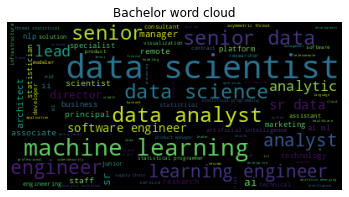

In [70]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words=100).generate(bsc_string)
plt.clf()
plt.title("Bachelor word cloud")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

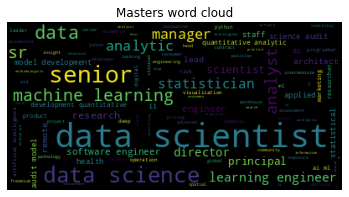

In [71]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words=100).generate(msc_string)
plt.clf()
plt.title("Masters word cloud")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

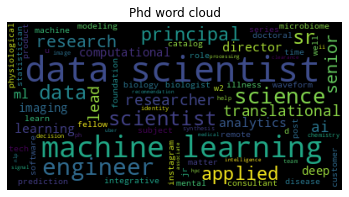

In [72]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words=100).generate(phd_string)
plt.clf()
plt.title("Phd word cloud")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [73]:
data.columns

Index(['title', 'company', 'location', 'description', 'city', 'State',
       'position', 'clean_description', 'sent_word_sets', 'bachelors',
       'masters', 'phd', 'min_qualification', 'clean_position',
       'job_location'],
      dtype='object')

In [74]:
data_qual = data.groupby('min_qualification').size()

<AxesSubplot:xlabel='min_qualification'>

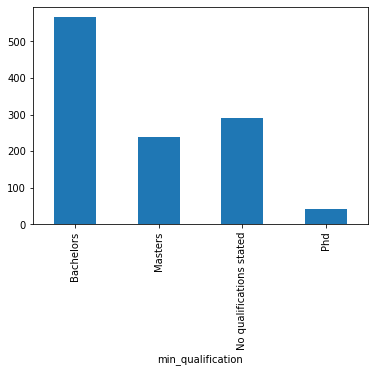

In [75]:
data_qual.plot.bar()

In [76]:
#data

In [202]:
data['job_location'].nunique()

320

In [203]:
data.to_csv("Indeed DS Job Posts_Processed.csv",index=False)

Questions to Answer:

What are the degree requirements:

Bachelors, Masters, PhD?

What Majors are most sought after?


#### Extracting the required Degree Major

In [204]:
degree = data[data['clean_description'].str.contains('degree')]

In [205]:
#degree['j_d1'] = degree.description.str.extract('(DEGREE.*)')

In [206]:
def degree_extraction(row):
    return ','.join([a for a in row.split('\n') if 'DEGREE' in a][0].split('DEGREE')[1:])
    

In [207]:
degree['description'].apply(degree_extraction)

0                       IN ENGINEERING OR TECHNICAL AREA.
1        IN COMPUTER SCIENCE, MATHEMATICS, PHYSICS, DA...
2        OF INDEPENDENCE OUR DATA SCIENTISTS HAVE HELP...
3        IN COMPUTER SCIENCE, OPERATIONS RESEARCH (OR)...
4        IN A QUANTITATIVE DISCIPLINE. EX: APPLIED MAT...
                              ...                        
4534     IN COMPUTER SCIENCE OR RELATED FIELD, OR EQUI...
4549    S IN STATISTICS, BIOSTATISTICS, AND/OR ECONOME...
4550                                                     
4565                                                     
4567     IN MATHEMATICS, STATISTICS, OPERATION RESEARC...
Name: description, Length: 743, dtype: object

In [208]:
degree['description_majors'] = degree['description'].apply(degree_extraction)
degree.to_csv('clean_job_descriptions_degrees_July_14.csv')

In [209]:
d_f = pd.DataFrame(degree['description_majors'].str.split(",").to_list())
#d_f

In [211]:
degree_df = degree[degree['description_majors'].notnull()]

In [212]:
relevant_degrees = ['computer science', 'Mathematics','statistics', 'analytics', 'data analytics', 'supply_chain', 
                    'finance', 'economics', 'business', 'accounting', 'logistics', 'data_science',
                    'engineering', 'physics', 'operations_research']

In [213]:
#new_df.dropna(inplace=True)
degree_df['description_majors']
#d = degree_df[degree_df['description_majors'].str.contains('COMPUTER SCIENCE')]
comp_sci = degree_df[degree_df['description_majors'].str.contains('COMPUTER SCIENCE')]['description_majors'].count()
Mathematics = degree_df[degree_df['description_majors'].str.contains('MATHEMATICS')]['description_majors'].count()
statistics = degree_df[degree_df['description_majors'].str.contains('STATISTICS')]['description_majors'].count()
analytics = degree_df[degree_df['description_majors'].str.contains('ANALYTICS')]['description_majors'].count()
data_analytics = degree_df[degree_df['description_majors'].str.contains('DATA ANALYTICS')]['description_majors'].count()
supply_chain = degree_df[degree_df['description_majors'].str.contains('SUPPLY CHAIN')]['description_majors'].count()
finance = degree_df[degree_df['description_majors'].str.contains('FINANCE')]['description_majors'].count()
economics = degree_df[degree_df['description_majors'].str.contains('ECONOMICS')]['description_majors'].count()
business = degree_df[degree_df['description_majors'].str.contains('BUSINESS')]['description_majors'].count()
accounting = degree_df[degree_df['description_majors'].str.contains('ACCOUNTING')]['description_majors'].count()
logistics = degree_df[degree_df['description_majors'].str.contains('LOGISTICS')]['description_majors'].count()
data_science = degree_df[degree_df['description_majors'].str.contains('DATA SCIENCE')]['description_majors'].count()
physics = degree_df[degree_df['description_majors'].str.contains('PHYSICS')]['description_majors'].count()
operations_research = degree_df[degree_df['description_majors'].str.contains('OPERATIONS RESEARCH')]['description_majors'].count()
engineering = degree_df[degree_df['description_majors'].str.contains('ENGINEERING')]['description_majors'].count()                                                                                     

In [215]:
degree['description_majors'].notnull().sum()

743

In [189]:
jobs_covered = set()
for degree in relevant_degrees:
    jobs_covered = jobs_covered | set(degree_df[degree_df['description_majors'].str.contains(degree.upper())].index.to_list())

In [190]:
len(jobs_covered)

507

In [235]:
# 'generals': information technology', 'computational sciences'
# 'abbreviations': IT, CS, CE
# 'niche': 'chemistry', 'behavioral science', 'social science'
# 'special cases': 85, 86

In [191]:
set(degree_df.index.to_list()) - jobs_covered

{2,
 20,
 28,
 38,
 39,
 45,
 46,
 52,
 62,
 74,
 83,
 85,
 86,
 88,
 92,
 103,
 104,
 108,
 111,
 119,
 132,
 146,
 155,
 158,
 159,
 164,
 174,
 176,
 184,
 186,
 191,
 199,
 201,
 211,
 217,
 224,
 227,
 239,
 241,
 244,
 254,
 256,
 258,
 260,
 273,
 278,
 282,
 289,
 291,
 294,
 299,
 303,
 304,
 309,
 319,
 320,
 324,
 325,
 333,
 336,
 342,
 354,
 357,
 365,
 370,
 372,
 374,
 379,
 380,
 387,
 393,
 398,
 413,
 432,
 434,
 438,
 442,
 444,
 447,
 450,
 453,
 469,
 474,
 478,
 482,
 488,
 491,
 494,
 501,
 503,
 521,
 523,
 542,
 545,
 552,
 554,
 559,
 561,
 563,
 564,
 575,
 576,
 581,
 583,
 589,
 590,
 593,
 594,
 596,
 605,
 606,
 607,
 611,
 614,
 621,
 624,
 634,
 649,
 651,
 656,
 670,
 680,
 681,
 689,
 708,
 721,
 729,
 741,
 746,
 748,
 749,
 760,
 764,
 772,
 773,
 780,
 781,
 783,
 785,
 792,
 800,
 807,
 815,
 820,
 821,
 825,
 831,
 835,
 843,
 844,
 852,
 853,
 859,
 860,
 876,
 877,
 880,
 882,
 883,
 888,
 891,
 892,
 910,
 913,
 918,
 921,
 926,
 928,
 931,
 9

In [240]:
print(degree_df.loc[92]['description'])

POSITION OVERVIEW:
NAVISTAR INTERNATIONAL CORPORATION IS A LEADING NORTH AMERICAN TRUCK MANUFACTURER WITH GREAT PRODUCTS, A STRONG MARKET POSITIONS AND BEST-IN-CLASS DISTRIBUTION NETWORKS.

WE ARE CURRENTLY SEEKING A LEAD DATA SCIENTIST TO JOIN OUR ANALYTICS TEAM AT OUR HEADQUARTERS IN LISLE, IL.

THE LEAD DATA SCIENTIST IS RESPONSIBLE TO PROVIDED DESCRIPTIVE, DIAGNOSTIC, PREDICTIVE AND PRESCRIPTIVE ANALYTICS TO SUPPORT OUR NAVISTAR FUNCTIONS SUCH AS SALES, WARRANTY, SERVICE, PARTS AND PRICING.

ESSENTIAL RESPONSIBILITIES INCLUDE, BUT ARE NOT LIMITED TO:

SUPPORT THE ORGANIZATION TO DERIVE VALUE FROM DATA SCIENCE AND ANALYTICS
ABILITY TO EXTRACT AND ANALYZE DATA FROM INTERNAL DATABASES AS WELL AS FROM EXTERNAL DATA
ACTIVE PARTICIPANT IN DATA ENGINEERING FOR THE TEAM
PREPARE RECURRING ANALYSIS, MONITORING, AND DEVELOP NEW ANALYSIS PROCESSES IN CONJUNCTION WITH MULTIPLE BUSINESS AREAS IN THE COMPANY.
DEVELOP NEW METHODS OF ANALYSIS AND SUPPORT ADOPTION OF ADVANCED ANALYTICAL TECHNIQUES T

In [241]:
degree_df.loc[92]['description_majors']

''

In [194]:
majors_df = pd.DataFrame({'majors': [comp_sci, Mathematics, statistics, analytics, data_analytics, supply_chain, finance, economics, business, accounting, logistics, data_science, engineering, physics, operations_research]})
#columns=['comp_sci', 'Mathematics','statistics', 'supply_chain', 'finance', 'logistics', 'data_science','physics', 'operations_research']
major = majors_df.transpose()
major.columns = relevant_degrees 
major.transpose()

,majors
computer science,355
Mathematics,234
statistics,279
analytics,59
data analytics,19
supply_chain,2
finance,26
economics,112
business,72
accounting,5


<AxesSubplot:>

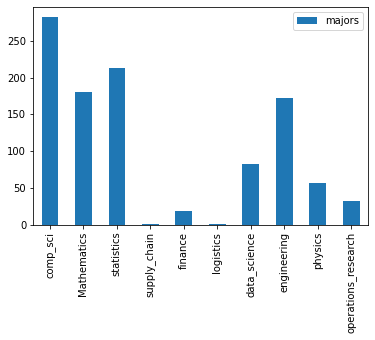

In [88]:
major.transpose().plot.bar()

In [89]:
m = major.transpose()
m

,majors
comp_sci,282
Mathematics,180
statistics,213
supply_chain,1
finance,19
logistics,1
data_science,83
engineering,172
physics,56
operations_research,32


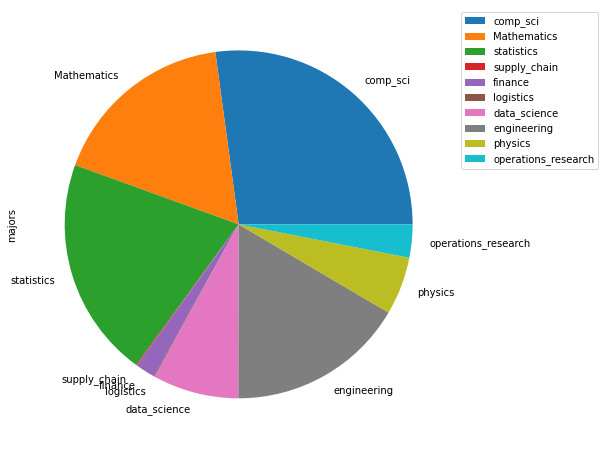

In [90]:
m = major.transpose()
m.plot.pie(subplots=True,y='majors', figsize=(15,8))
plt.legend(bbox_to_anchor=(1, 1), loc='best', borderaxespad=0.5)

### Analyzing the Job Description for Skills Required

In [91]:
data

,title,company,location,description,city,State,position,clean_description,sent_word_sets,bachelors,masters,phd,min_qualification,clean_position,job_location
0,Data Scientist,Harvey Nash Group,"Mossville, Illinois",DATA SCIENTIST/ DEV/RESEARCH ENGINEER 3 (11976...,Mossville,Illinois,Data Scientist,data scientist devresearch engineer location...,"{experience, contract, devresearch, responsibi...",True,False,False,Bachelors,data scientist,mossville illinois
1,Data Scientist 2,Oracle,"Virginia, Virginia","DATA SCIENCE ASSOCIATE, ORACLE FOR STARTUPS\n\...",Virginia,Virginia,Data Scientist,data science associate oracle for startups an...,"{collect, experience, several, orientation, va...",False,True,False,Masters,data scientist 2,virginia virginia
2,Senior Data Scientist,TIBCO Software,"Chapel Hill, North Carolina",OUR DATA SCIENTISTS ARE CENTRAL TO OUR GLOBAL ...,Chapel Hill,North Carolina,Data Scientist,our data scientists are central to our global ...,"{responsible, value, transform, engage, develo...",False,False,False,No qualifications stated,senior data scientist,chapel hill north carolina
3,AI/ML Data Scientist,FinTek Solutions LLC,"Atlanta, Georgia","VISAS ACCEPTED- H4-EAD, GC, GC-EAD, US CITIZEN...",Atlanta,Georgia,Data Scientist,visas accepted gc gcead us citizens no and o...,"{transportation, experience, contract, librari...",True,True,True,Bachelors,ai ml data scientist,atlanta georgia
4,Data Scientist - NO C2C,Rangam Consultants Inc,"Oak Brook, Illinois",THIS POSITION IS RESPONSIBLE FOR ENABLING UTIL...,Oak Brook,Illinois,Data Scientist,this position is responsible for enabling util...,"{responsible, parameter, experience, problems,...",True,False,False,Bachelors,data scientist no c2c,oak brook illinois
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4550,"Data Scientist, Senior",Booz Allen Hamilton,"Chantilly, Virginia",THE CHALLENGE:\nARE YOU LOOKING FOR AN OPPORTU...,Chantilly,Virginia,Data Scientist,the challenge are you looking for an opportuni...,"{software, experience, processes, methodologie...",True,True,False,Bachelors,data scientist senior,chantilly virginia
4564,Data Scientist,Cyient,"Phoenix, Arizona",ABOUT THE ROLE:\nTHE POSITION CREATES NEW FOOT...,Phoenix,Arizona,Data Scientist,about the role the position creates new footpr...,"{experience, problems, temporarily, methodolog...",False,False,False,No qualifications stated,data scientist,phoenix arizona
4565,"Machine Learning Data Specialist, Community Pa...",Ursus,"Menlo Park, California","JOB TITLE: MACHINE LEARNING DATA SPECIALIST, C...",Menlo Park,California,"MACHINE LEARNING DATA SPECIALIST, COMMUNITY PA...",job title machine learning data specialist com...,"{software, receive, advice, experience, contra...",True,True,False,Bachelors,machine learning data specialist community par...,menlo park california
4566,"Director, Statistical Programming",Penfield Search Partners,"Boston, Massachusetts",SALARY: COMMENSURATE WITH EXPERIENCE\nREFERENC...,Boston,Massachusetts,Data Science Manager,salary commensurate with experience reference ...,"{serve, software, experience, common, regulato...",True,True,False,Bachelors,director statistical programming,boston massachusetts


In [92]:
description = data['description']
descriptions = data['clean_description']

['Qualifications', 'Requirements', 'Experience', 'Required']

In [93]:
#print(description[103])

In [94]:
#import the wordcloud package
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#Define the word cloud function with a max of 200 words
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=120, figure_size=(15,15), 
                   title = None, title_size=20, image_color=False):
    stopwords = set(STOPWORDS)
    #define additional stop words that are not contained in the dictionary
    #more_stopwords = {'one', 'object', 'nTHE', 'Name', 'nARE', 'are','and','Unknown', 'H4','EAD','length','VISAS', 'dtype','startups'}
    #stopwords = stopwords.union(more_stopwords)
    #Generate the word cloud
    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    #set the plot parameters
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
#ngram function
def ngram_extractor(text, n_gram):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# Function to generate a dataframe with n_gram and top max_row frequencies
def generate_ngrams(df, n_gram, max_row):
    temp_dict = defaultdict(int)
    for question in df:
        for word in ngram_extractor(question, n_gram):
            temp_dict[word] += 1
    temp_df = pd.DataFrame(sorted(temp_dict.items(), key=lambda x: x[1])[::-1]).head(max_row)
    temp_df.columns = ["word", "wordcount"]
    return temp_df

#Function to construct side by side comparison plots
def comparison_plot(df_1,df_2,col_1,col_2, space):
    fig, ax = plt.subplots(1, 2, figsize=(20,10))
    
    sns.barplot(x=col_2, y=col_1, data=df_1, ax=ax[0], color="royalblue")
    sns.barplot(x=col_2, y=col_1, data=df_2, ax=ax[1], color="royalblue")

    ax[0].set_xlabel('Word count', size=14)
    ax[0].set_ylabel('Words', size=14)
    ax[0].set_title('Top 20 Bi-grams in Descriptions', size=18)

    ax[1].set_xlabel('Word count', size=14)
    ax[1].set_ylabel('Words', size=14)
    ax[1].set_title('Top 20 Tri-grams in Descriptions', size=18)

    fig.subplots_adjust(wspace=space)
    
    plt.show()


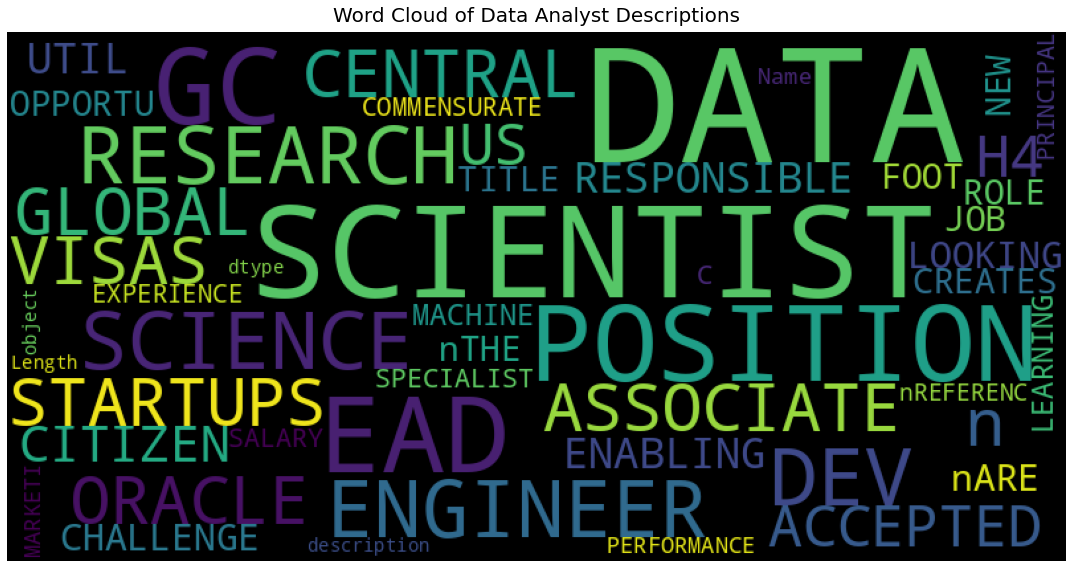

In [95]:
plot_wordcloud(description, title="Word Cloud of Data Analyst Descriptions")

In [96]:
#sentences[0]

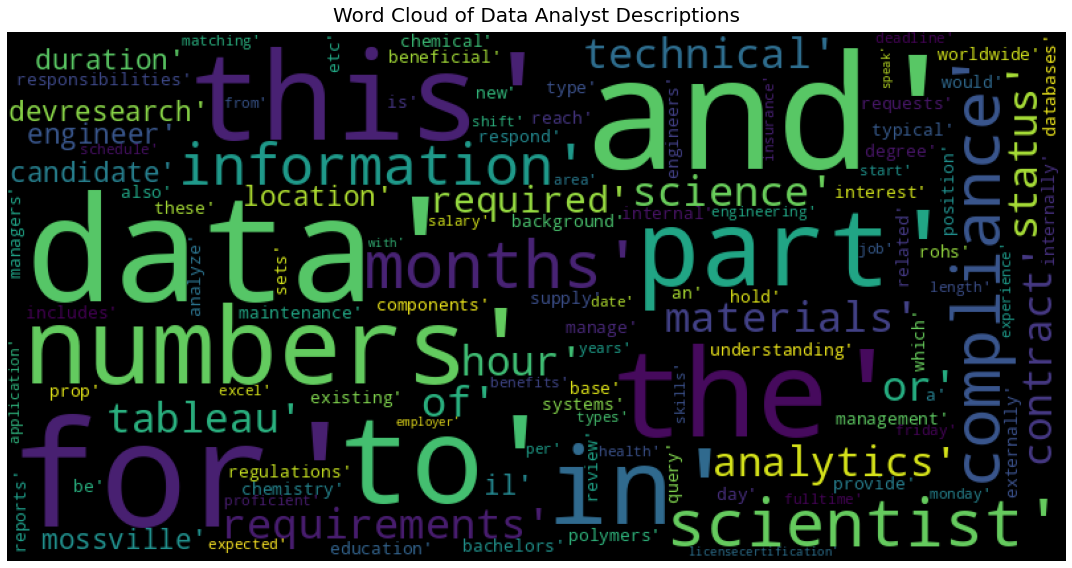

In [97]:
plot_wordcloud(sentences[0], title="Word Cloud of Data Analyst Descriptions")

In [98]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

#phrase = "Here is an example sentence to demonstrate the removal of stopwords"

#words = word_tokenize(phrase)

stripped_phrase = []
stripped_sentence = []
for sentence in sentences:
    for word in sentence:
        if word not in stop_words:
            stripped_phrase.append(word)
    stripped_sentence.append(stripped_phrase)

des_1 = " ".join(stripped_phrase)
#des_2 = " ".join(stripped_sentence)

In [99]:
#stripped_phrase

In [100]:
#stripped_sentence[0]

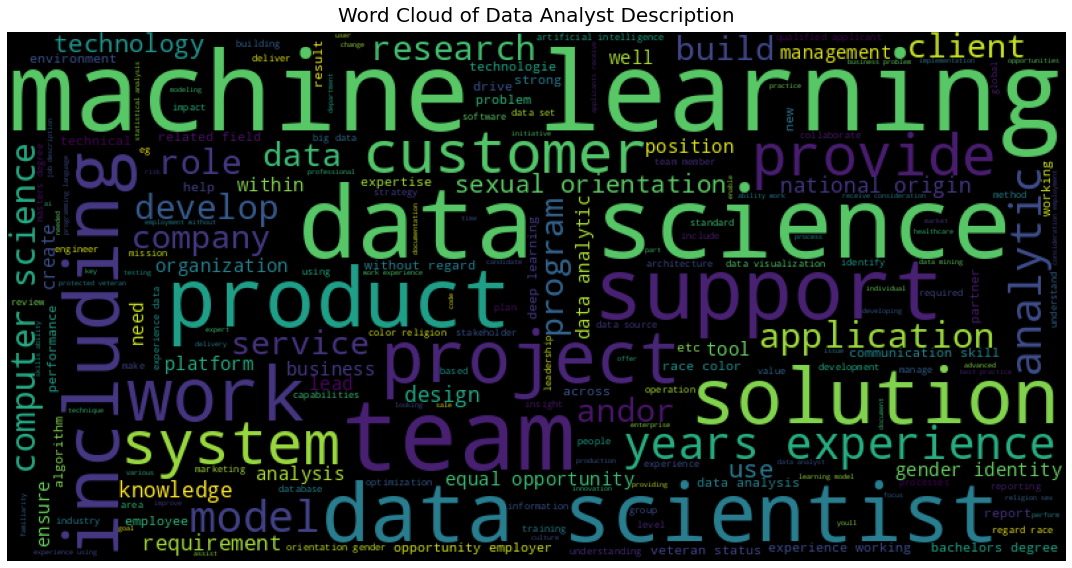

In [101]:
plot_wordcloud(des_1, title="Word Cloud of Data Analyst Description")

In [102]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [103]:
description_sentences_2 = []
description_word_sets_2 = []
for row in data.iterrows():
    desc1 = row[1].clean_description
    word_tokens_2 = nltk.word_tokenize(desc1)
    description_sentences_2.append(word_tokens_2)
    description_word_sets_2.append(set(word_tokens_2))

In [104]:
p1 = set()
s1 = model.wv.most_similar('computer science', topn=30)
for tup in similar_words:
    p1.add(tup[0])
s1

KeyError: "Key 'computer science' not present"